In [1]:
# Import Library
import numpy as np  #numPy library for numerical and array operation
import pandas as pd #pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #matplotlib library for data visualization
from sklearn.preprocessing import StandardScaler #the StandardScaler class from scikit-learn's preprocessing module
from sklearn import metrics #the metrics module from scikit-learn for evaluating machine learning models
import warnings  #the warnings module to handle warnings during code execution
import seaborn as sns #the seaborn library for data visualization
from sklearn.preprocessing import LabelEncoder
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Load Dataset

In [2]:
# Loading the dataset
data = pd.read_excel('KTAS_Data.xlsx')
# Print the first 5 rows of the dataframe.
data.head()

,Group,Gender,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71.0,3,3,2,right ocular pain,1,1,2.0,...,36.6,100,2,Corneal abrasion,1,4,2,86.0,5.000000,1
1,1,1,56.0,12,3,2,right forearm burn,1,1,2.0,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64.0,3.950000,1
2,2,1,67.5,8,2,2,"arm pain, Lt",1,1,2.0,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862.0,1.000000,1
3,1,2,71.0,8,1,1,ascites tapping,1,1,3.0,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108.0,9.833333,1
4,1,2,58.0,4,3,1,"distension, abd",1,1,3.0,...,36.5,NaN,4,Ascites,1,5,8,109.0,6.600000,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Gender                    1267 non-null   int64  
 2   Age                       1267 non-null   float64
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  711 non-null    float64
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

In [4]:
#Checking shape
data.shape

(1267, 24)

In [5]:
data.describe()

,Group,Gender,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,NRS_pain,KTAS_RN,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,711.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,1.456985,1.521705,54.394396,7.519337,2.820837,1.192581,1.105762,0.563536,4.104079,3.335438,1.609313,3.265983,0.558011,11016.106570,5.497409,0.250197
std,0.498343,0.499726,19.722260,3.160563,0.807904,0.394482,0.447768,0.496143,1.419332,0.885391,1.157983,0.885803,1.571489,80446.091522,3.459495,0.628250
min,1.000000,1.000000,15.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.026713,1.000000,0.000000
25%,1.000000,1.000000,37.000000,5.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,3.000000,0.000000,133.000000,3.000000,0.000000
50%,1.000000,2.000000,57.000000,7.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000,0.000000,274.000000,4.283333,0.000000
75%,2.000000,2.000000,71.000000,10.000000,3.000000,1.000000,1.000000,1.000000,5.000000,4.000000,2.000000,4.000000,0.000000,606.500000,7.000000,0.000000
max,2.000000,2.000000,95.800000,17.000000,7.000000,2.000000,4.000000,1.000000,10.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,17.366670,2.000000


In [6]:
#Checking number of unique values
data.nunique()

Group                         2
Gender                        2
Age                         427
Patients number per hour     16
Arrival mode                  7
Injury                        2
Chief_complain              427
Mental                        4
Pain                          2
NRS_pain                     10
SBP                         127
DBP                          83
HR                           94
RR                           11
BT                           46
Saturation                   22
KTAS_RN                       5
Diagnosis in ED             583
Disposition                   7
KTAS_expert                   5
Error_group                  10
Length of stay_min          735
KTAS duration_min           392
mistriage                     3
dtype: int64

In [7]:
desr = pd.read_excel('KTAS_Descriptions.xlsx',header=None, names=['Column','Describtion'])
desr

,Column,Describtion
0,Group,1: Local ED / 2: Regional ED
1,Gender,1: Female / 2: Male
2,Age,Age (Years)
3,Patients number per hour,Patients number/hous
4,Arrival mode,1: Walking / 2: 119 use / 3: Private car / 4: ...
5,Injury,1: Non-injury / 2: Injury
6,Mental,1: Alert / 2: Verval response / 3: Pain respon...
7,Pain,1: Pain / 2: Non-pain
8,NRS_pain,Numeric rating scales of pain
9,SBP,Systolid blood pressure


### Identifying Null Values

In [8]:
# calculate and store the count of missing (NaN) values in each column of the DataFrame 'data' 
data.isnull().sum()

Group                         0
Gender                        0
Age                           0
Patients number per hour      0
Arrival mode                  0
Injury                        0
Chief_complain                0
Mental                        0
Pain                          0
NRS_pain                    556
SBP                           0
DBP                           0
HR                            0
RR                            0
BT                            0
Saturation                  688
KTAS_RN                       0
Diagnosis in ED               2
Disposition                   0
KTAS_expert                   0
Error_group                   0
Length of stay_min            0
KTAS duration_min             0
mistriage                     0
dtype: int64

When we looked to the saturation column, we saw the "측불" value which we could not find any meaning.<br> So it will discarded then convert the column into float type.

### Addressing Null Values

1. NRS_pain and Saturation: We decided to fill the NRS_pain and Saturation columns with the average value of the related chief complaint, as we believe the missing values are likely similar to the average for that category. 
2. Diagnosis in ED: we decided to discard rows with missing values, as we cannot reliably impute the diagnosis and the missing values could significantly impact our analysis.

In [9]:
#Converting numeric columns from object to numeric
data['Saturation'] = data['Saturation'].apply(pd.to_numeric, errors='coerce')
data['HR'] = data['HR'].apply(pd.to_numeric, errors='coerce')
data['RR'] = data['RR'].apply(pd.to_numeric, errors='coerce')
data['BT'] = data['BT'].apply(pd.to_numeric, errors='coerce')
data['NRS_pain'] = data['NRS_pain'].apply(pd.to_numeric, errors='coerce')
data['SBP'] = data['SBP'].apply(pd.to_numeric, errors='coerce')
data['DBP'] = data['DBP'].apply(pd.to_numeric, errors='coerce')

In [10]:
#Checking number of unique values
data.nunique()

Group                         2
Gender                        2
Age                         427
Patients number per hour     16
Arrival mode                  7
Injury                        2
Chief_complain              427
Mental                        4
Pain                          2
NRS_pain                     10
SBP                         126
DBP                          82
HR                           93
RR                           10
BT                           41
Saturation                   21
KTAS_RN                       5
Diagnosis in ED             583
Disposition                   7
KTAS_expert                   5
Error_group                  10
Length of stay_min          735
KTAS duration_min           392
mistriage                     3
dtype: int64

In [11]:
#Replacing number representation of categorical column to text
data['mistriage'].replace({0: 'Correct', 1: 'Over triage', 2: 'Under triage'}, inplace=True)
data['Group'].replace({1: 'Local ED' , 2: 'Regional ED'}, inplace=True)
data['Injury'].replace({1: 'non-injured' , 2: 'injury'}, inplace=True)
data['Gender'].replace({1: 'Female' , 2: 'Male'}, inplace=True)
data['Pain'].replace({1: 'pain' , 0: 'non-pain'}, inplace=True)
data['NRS_pain'].replace({ '#BO�!': 0}, inplace=True) 
data['Mental'].replace({1: 'Alert',2: 'Verbal Resppne',3: 'Pain Response',4: 'unconcious'}, inplace=True)
data['Disposition'].replace({1: 'Discharge',2: 'Ward admission', 3: 'ICU admission', 4: 'AMA discharge', 5: 'Transfer',6: 'Death' , 7: 'OP fom ED'},inplace=True)
data['Arrival mode'].replace({1: 'Walking',2: '119 use',3: 'Private car',4: 'Private ambulance',5: 'Public transporation (Police ets)',6: 'Wheelchair', 7: 'Others'}, inplace=True)
data.head(3)

,Group,Gender,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED,Male,71.0,3,Private car,injury,right ocular pain,Alert,pain,2.0,...,36.6,100.0,2,Corneal abrasion,Discharge,4,2,86.0,5.00,Over triage
1,Local ED,Female,56.0,12,Private car,injury,right forearm burn,Alert,pain,2.0,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",Discharge,5,4,64.0,3.95,Over triage
2,Regional ED,Female,67.5,8,119 use,injury,"arm pain, Lt",Alert,pain,2.0,...,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",Ward admission,5,4,862.0,1.00,Over triage


In [12]:
# selects and list the names of columns that contain object data types in the DataFrame 'data'
cat_columns= data.select_dtypes(include="O").columns.to_list()
cat_columns

['Group',
 'Gender',
 'Arrival mode',
 'Injury',
 'Chief_complain',
 'Mental',
 'Pain',
 'Diagnosis in ED',
 'Disposition',
 'mistriage']

In [13]:
# selects and list the names of columns that have numeric data types in the DataFrame 'data'
num_columns=data.select_dtypes(include=np.number).columns.to_list()
num_columns

['Age',
 'Patients number per hour',
 'NRS_pain',
 'SBP',
 'DBP',
 'HR',
 'RR',
 'BT',
 'Saturation',
 'KTAS_RN',
 'KTAS_expert',
 'Error_group',
 'Length of stay_min',
 'KTAS duration_min']

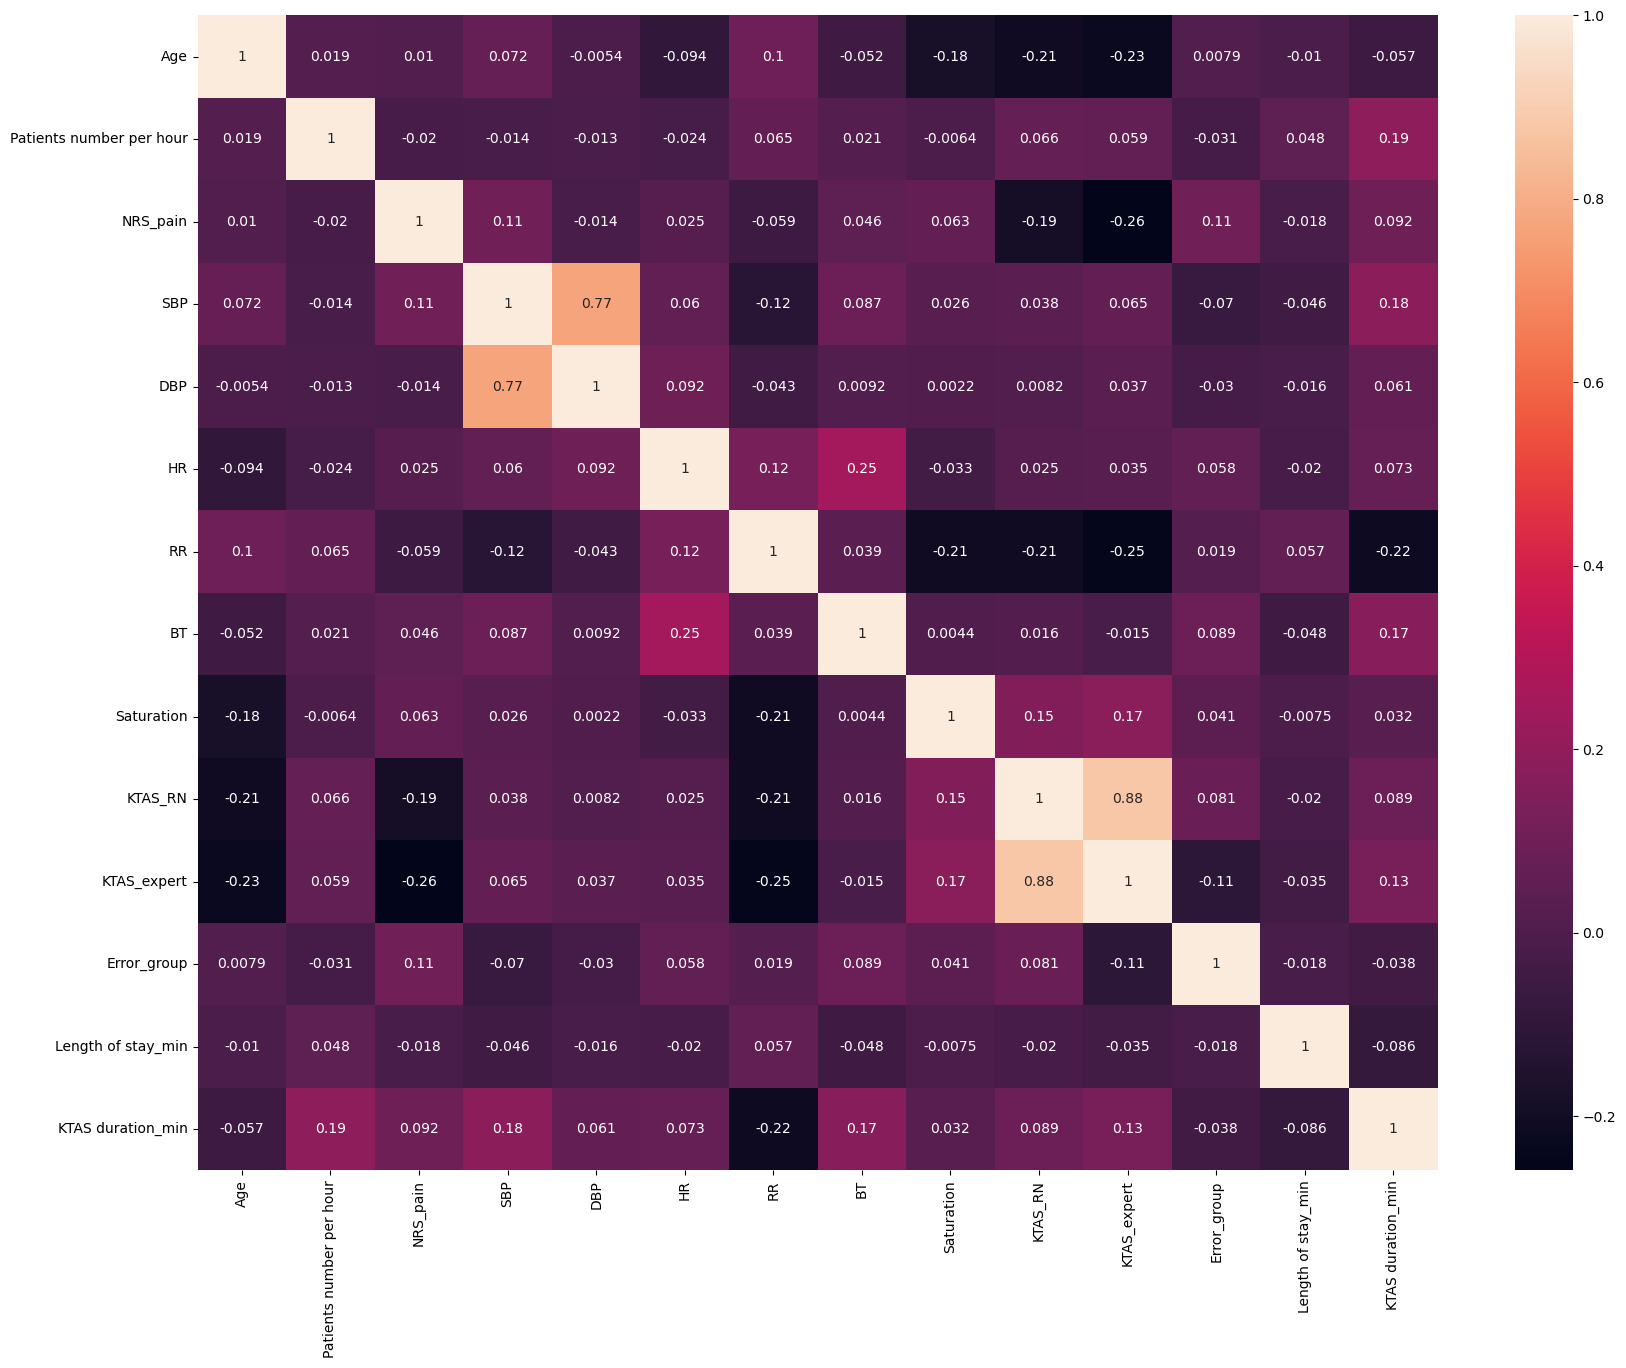

In [14]:
# The 'annot=True' parameter ensures that the correlation coefficients are displayed on the heatmap for better clarity.
plt.subplots(figsize=(20,15))
sns.heatmap(data[num_columns].corr(),annot=True)

plt.show() # Display heatmap plot

In [15]:
data.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,1267.0,54.394396,19.722260,15.500000,25.0,37.0,57.000000,71.0,79.000000,82.340000,88.102000,95.80000
Patients number per hour,1267.0,7.519337,3.160563,1.000000,3.0,5.0,7.000000,10.0,12.000000,13.000000,15.000000,17.00000
NRS_pain,711.0,4.104079,1.419332,1.000000,3.0,3.0,4.000000,5.0,6.000000,7.000000,8.000000,10.00000
SBP,1242.0,133.648953,27.275639,50.000000,100.0,114.0,130.000000,150.0,168.000000,186.950000,205.590000,275.00000
DBP,1238.0,79.780291,15.154292,31.000000,60.0,70.0,80.000000,90.0,100.000000,103.000000,115.000000,160.00000
HR,1247.0,83.963111,16.644096,32.000000,64.0,72.0,82.000000,96.0,106.000000,111.000000,127.540000,148.00000
RR,1245.0,19.506827,2.016649,14.000000,16.0,18.0,20.000000,20.0,20.000000,22.000000,28.000000,30.00000
BT,1249.0,36.580624,0.545708,35.000000,36.0,36.2,36.500000,36.8,37.200000,37.500000,38.552000,41.00000
Saturation,570.0,97.024561,4.350556,20.000000,95.0,97.0,98.000000,98.0,99.000000,99.000000,100.000000,100.00000
KTAS_RN,1267.0,3.335438,0.885391,1.000000,2.0,3.0,3.000000,4.0,4.000000,5.000000,5.000000,5.00000


In [16]:
#Checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   object 
 1   Gender                    1267 non-null   object 
 2   Age                       1267 non-null   float64
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   object 
 5   Injury                    1267 non-null   object 
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   object 
 8   Pain                      1267 non-null   object 
 9   NRS_pain                  711 non-null    float64
 10  SBP                       1242 non-null   float64
 11  DBP                       1238 non-null   float64
 12  HR                        1247 non-null   float64
 13  RR                        1245 non-null   float64
 14  BT      

In [17]:
#Checking to see if any rows are duplicated
data.duplicated().sum()

0

In [18]:
#Checking to see how many null columns
data.isna().sum(axis=0)/data.shape[0]*100

Group                        0.000000
Gender                       0.000000
Age                          0.000000
Patients number per hour     0.000000
Arrival mode                 0.000000
Injury                       0.000000
Chief_complain               0.000000
Mental                       0.000000
Pain                         0.000000
NRS_pain                    43.883189
SBP                          1.973165
DBP                          2.288871
HR                           1.578532
RR                           1.736385
BT                           1.420679
Saturation                  55.011839
KTAS_RN                      0.000000
Diagnosis in ED              0.157853
Disposition                  0.000000
KTAS_expert                  0.000000
Error_group                  0.000000
Length of stay_min           0.000000
KTAS duration_min            0.000000
mistriage                    0.000000
dtype: float64

In [19]:
#Isolating only NRS_pain null rows
null_NRS_Pain_dataset=data[data['NRS_pain'].isnull()]
null_NRS_Pain_dataset.head(3)

,Group,Gender,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
29,Local ED,Male,49.0,3,119 use,non-injured,Seizure Like Activity,Alert,non-pain,NaN,...,37.4,NaN,2,Seizure,Discharge,3,5,304.0,5.300000,Over triage
30,Local ED,Male,32.0,10,Private car,non-injured,post seizure,Alert,non-pain,NaN,...,36.7,NaN,2,Fracture of mandible open,Ward admission,3,1,321.0,7.416667,Over triage
31,Local ED,Female,65.0,12,Wheelchair,non-injured,vomiting,Alert,non-pain,NaN,...,36.1,NaN,3,Vomiting,Discharge,4,1,183.0,12.483330,Over triage


In [20]:
#Checking how many null rows have no pain
null_NRS_Pain_dataset['Pain'].value_counts()

Pain
non-pain    553
pain          3
Name: count, dtype: int64

In [21]:
#Checking the NRS_Pain assigned to non-pain patients
non_pain_data=data[data['Pain']=='non-pain']
non_pain_data['NRS_pain'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
#Replacing null columns with 0
data['NRS_pain'].fillna(0, inplace=True)

In [23]:
#Checking statistics summary
data["Saturation"].describe()

count    570.000000
mean      97.024561
std        4.350556
min       20.000000
25%       97.000000
50%       98.000000
75%       98.000000
max      100.000000
Name: Saturation, dtype: float64

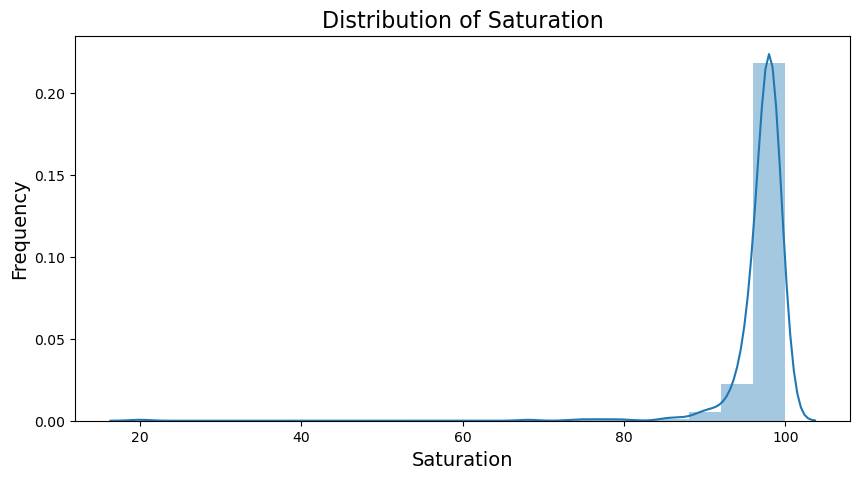

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(data['Saturation'], bins = 20) 
# Set titles and labels
ax.set_title('Distribution of Saturation', fontsize=16)
ax.set_xlabel('Saturation', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [25]:
#Replacing missing values with mean
data["Saturation"]=data["Saturation"].fillna(data["Saturation"].mean())

In [26]:
#Replacing null values with median
data["SBP"]=data["SBP"].fillna(data["SBP"].median())
data["DBP"]=data["DBP"].fillna(data["DBP"].median())
data["HR"]=data["HR"].fillna(data["HR"].median())
data["RR"]=data["RR"].fillna(data["RR"].median())
data["BT"]=data["BT"].fillna(data["BT"].median())


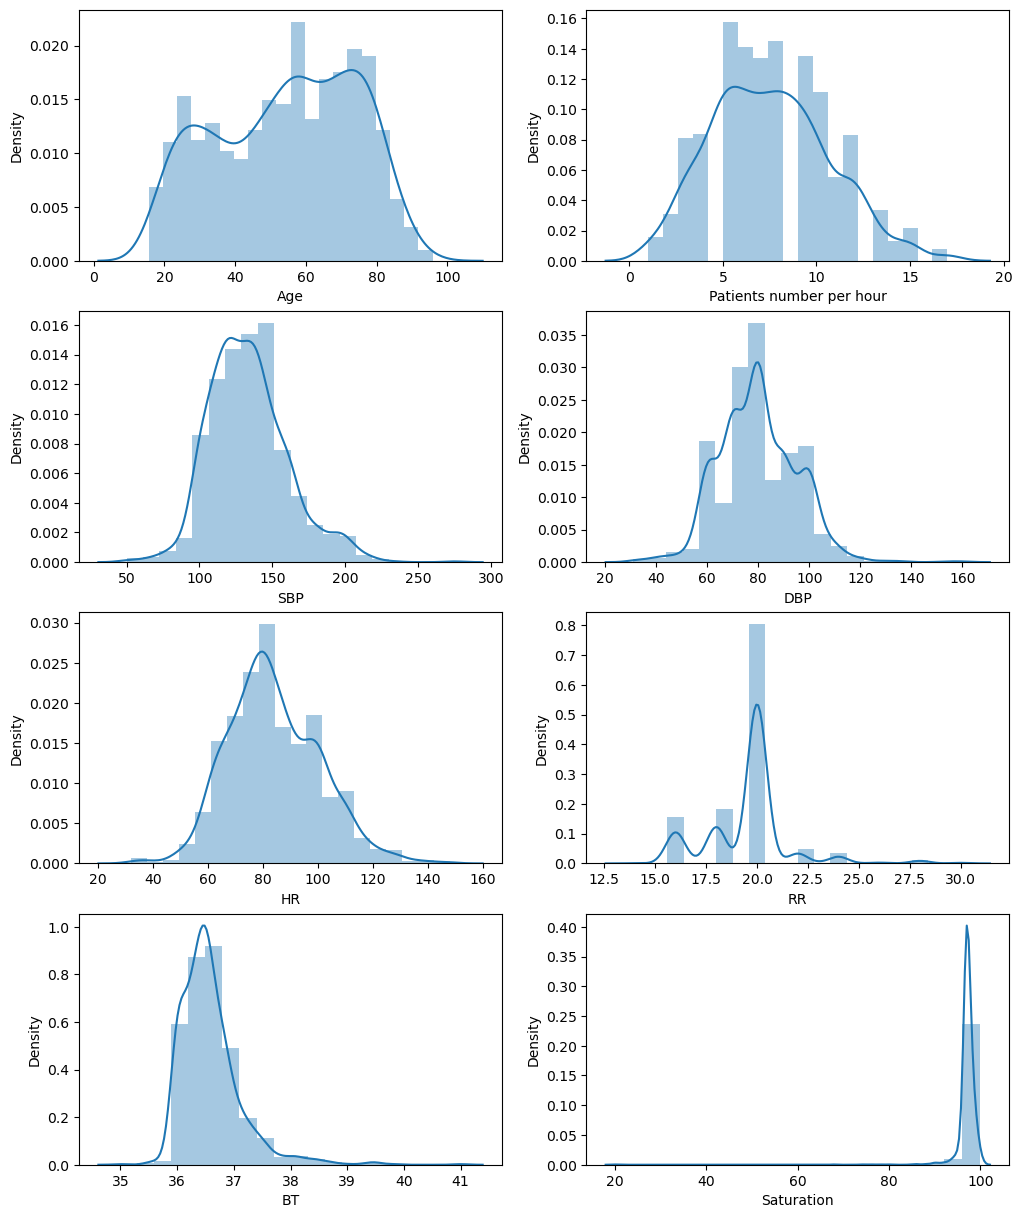

In [27]:
df=data
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(12,15))
sns.distplot(data['Age'], bins = 20, ax=ax[0,0]) 
sns.distplot(data['Patients number per hour'], bins = 20, ax=ax[0,1]) 
sns.distplot(data['SBP'], bins = 20, ax=ax[1,0]) 
sns.distplot(data['DBP'], bins = 20, ax=ax[1,1]) 
sns.distplot(data['HR'], bins = 20, ax=ax[2,0])
sns.distplot(data['RR'], bins = 20, ax=ax[2,1])
sns.distplot(data['BT'], bins = 20, ax=ax[3,0]) 
sns.distplot(data['Saturation'], bins = 20, ax=ax[3,1]) 

plt.show()

In [28]:
#Finding the most common diagnosis
data["Diagnosis in ED"].mode()

0    Acute gastroenteritis
Name: Diagnosis in ED, dtype: object

In [29]:
#Replacing null with mode
data["Diagnosis in ED"]=data["Diagnosis in ED"].fillna('Acute gastroenteritis')

In [30]:
#Checking null values again
data.isna().sum(axis=0)

Group                       0
Gender                      0
Age                         0
Patients number per hour    0
Arrival mode                0
Injury                      0
Chief_complain              0
Mental                      0
Pain                        0
NRS_pain                    0
SBP                         0
DBP                         0
HR                          0
RR                          0
BT                          0
Saturation                  0
KTAS_RN                     0
Diagnosis in ED             0
Disposition                 0
KTAS_expert                 0
Error_group                 0
Length of stay_min          0
KTAS duration_min           0
mistriage                   0
dtype: int64

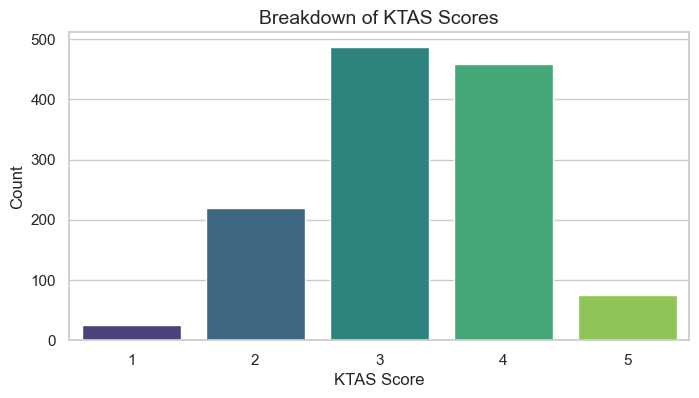

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a count plot using seaborn
plt.figure(figsize=(8, 4))
sns.countplot(x='KTAS_expert', data=data, palette='viridis')

# Set labels and title
plt.xlabel('KTAS Score', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of KTAS Scores', size=14)

# Show the plot
plt.show()


In [32]:
# Grouping the KTAS classes into emergency (1) and non-emergency (0)
data["KTAS_expert"] = np.where(data["KTAS_expert"] < 4, 1, 0)

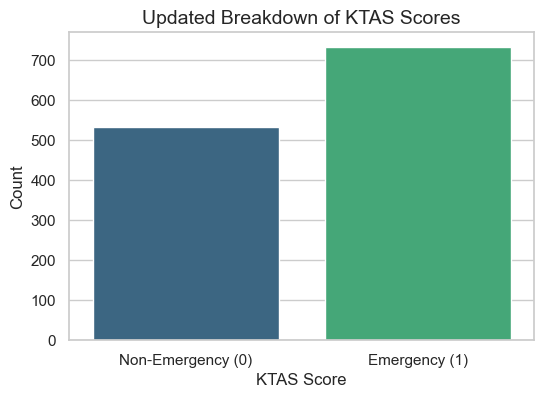

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the values in KTAS_expert
ktas_counts = data['KTAS_expert'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=ktas_counts.index, y=ktas_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('KTAS Score', size=12)
plt.ylabel('Count', size=12)
plt.title('Updated Breakdown of KTAS Scores', size=14)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()


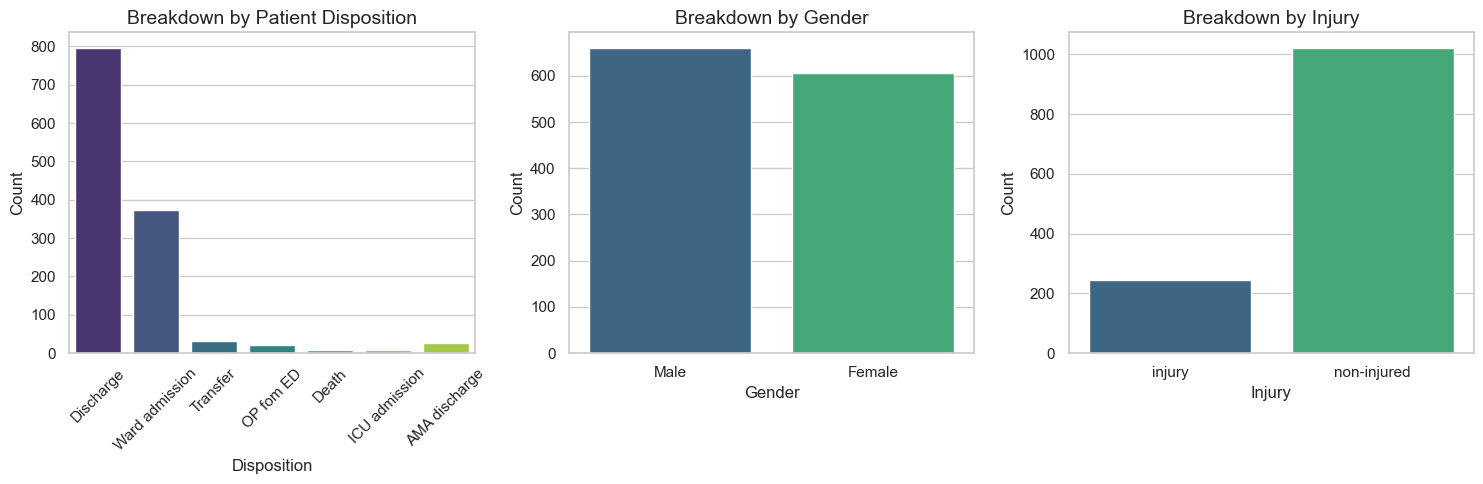

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot of three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Disposition
sns.countplot(x='Disposition', data=data, ax=axs[0], palette='viridis')
axs[0].set_ylabel('Count', size=12)
axs[0].set_title('Breakdown by Patient Disposition', size=14)
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plotting Gender
sns.countplot(x='Gender', data=data, ax=axs[1], palette='viridis')
axs[1].set_ylabel('Count', size=12)
axs[1].set_title('Breakdown by Gender', size=14)
axs[1].tick_params(axis='x', rotation=0)  # Keep gender labels horizontal

# Plotting Injury
sns.countplot(x='Injury', data=data, ax=axs[2], palette='viridis')
axs[2].set_ylabel('Count', size=12)
axs[2].set_title('Breakdown by Injury', size=14)
axs[2].tick_params(axis='x', rotation=0)  # Keep injury labels horizontal

# Adjust layout
plt.tight_layout()
plt.show()


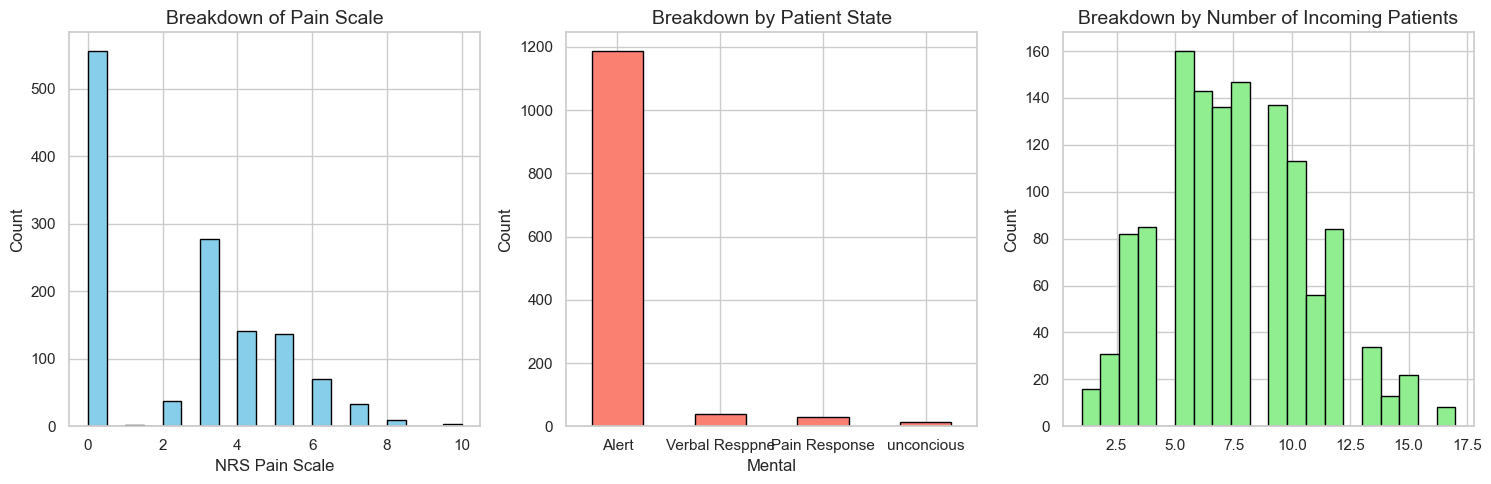

In [36]:
import matplotlib.pyplot as plt

# Create a subplot of three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting NRS_pain histogram
data['NRS_pain'].plot(kind='hist', ax=axs[0], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('NRS Pain Scale', size=12)
axs[0].set_ylabel('Count', size=12)
axs[0].set_title('Breakdown of Pain Scale', size=14)

# Plotting Mental state bar chart
data['Mental'].value_counts().plot(kind='bar', ax=axs[1], color='salmon', edgecolor='black')
axs[1].set_ylabel('Count', size=12)
axs[1].set_title('Breakdown by Patient State', size=14)
axs[1].tick_params(axis='x', rotation=0)  # Keep labels horizontal for clarity

# Plotting Patients number per hour histogram
data['Patients number per hour'].plot(kind='hist', ax=axs[2], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_ylabel('Count', size=12)
axs[2].set_title('Breakdown by Number of Incoming Patients', size=14)

# Adjust layout
plt.tight_layout()
plt.show()


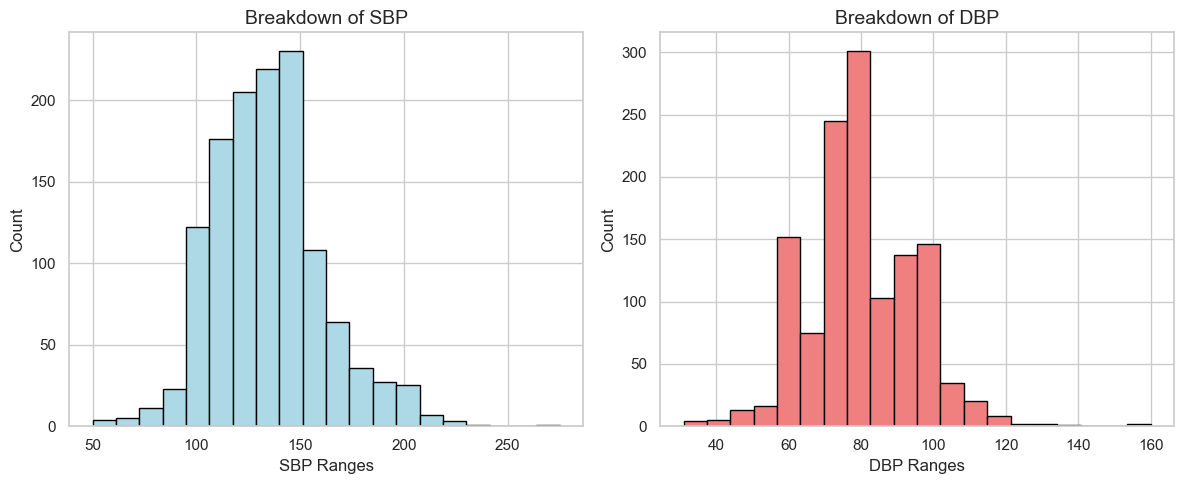

In [37]:
import matplotlib.pyplot as plt

# Create a subplot of two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting SBP histogram
data['SBP'].plot(kind='hist', ax=axs[0], bins=20, color='lightblue', edgecolor='black')
axs[0].set_xlabel('SBP Ranges', size=12)
axs[0].set_ylabel('Count', size=12)
axs[0].set_title('Breakdown of SBP', size=14)

# Plotting DBP histogram
data['DBP'].plot(kind='hist', ax=axs[1], bins=20, color='lightcoral', edgecolor='black')
axs[1].set_ylabel('Count', size=12)
axs[1].set_xlabel('DBP Ranges', size=12)
axs[1].set_title('Breakdown of DBP', size=14)

# Adjust layout
plt.tight_layout()
plt.show()


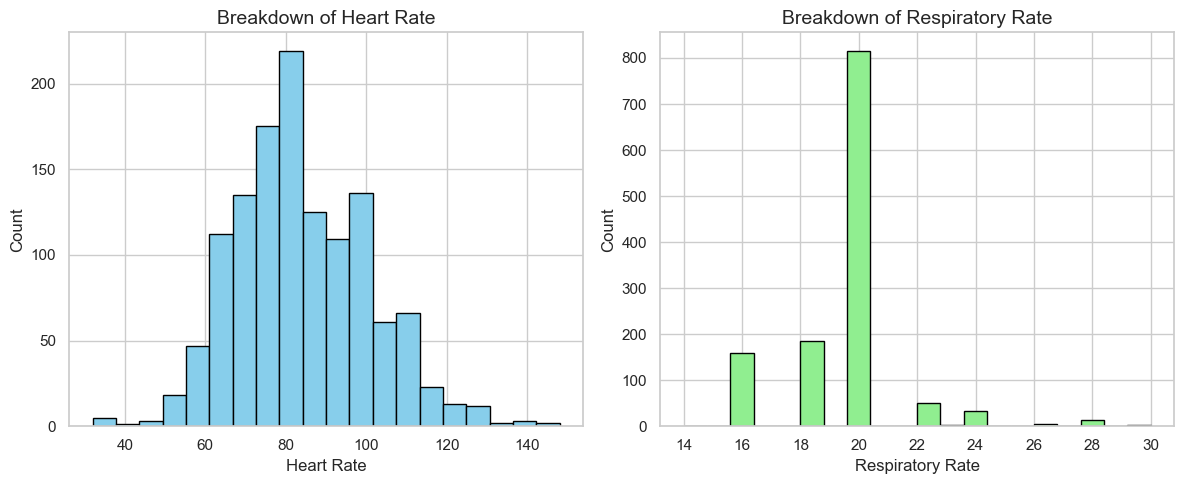

In [38]:
# Create a subplot of two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting HR histogram
data['HR'].plot(kind='hist', ax=axs[0], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Heart Rate', size=12)
axs[0].set_ylabel('Count', size=12)
axs[0].set_title('Breakdown of Heart Rate', size=14)

# Plotting RR histogram
data['RR'].plot(kind='hist', ax=axs[1], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_ylabel('Count', size=12)
axs[1].set_xlabel('Respiratory Rate', size=12)
axs[1].set_title('Breakdown of Respiratory Rate', size=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [39]:
# Define age bins and corresponding labels
bins = [-1, 23, 39, 60, float('inf')]  # Use -1 for including ages <= 23 and float('inf') for ages > 60
labels = ['Youth', 'Young Adult', 'Middle-aged Adult', 'Senior']

# Create the age_group column using pd.cut
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Check the result
print(data[['Age', 'age_group']].head())


    Age          age_group
0  71.0             Senior
1  56.0  Middle-aged Adult
2  67.5             Senior
3  71.0             Senior
4  58.0  Middle-aged Adult


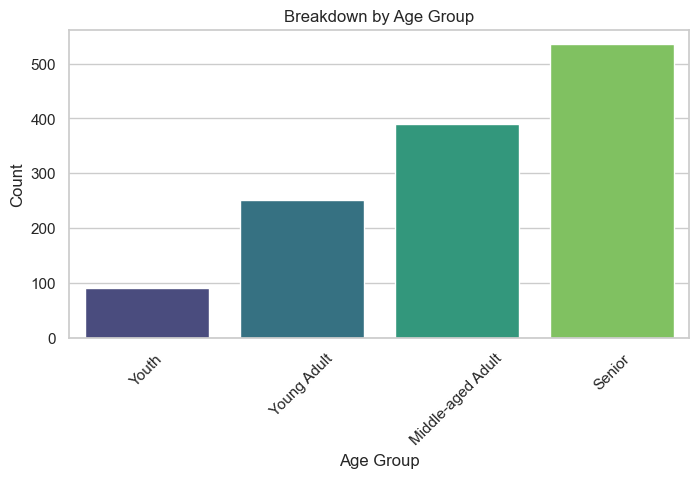

In [40]:
# Plotting the count of each age range using Seaborn with the 'viridis' palette
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', data=data, palette='viridis')
plt.xlabel('Age Group', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown by Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1000x500 with 0 Axes>

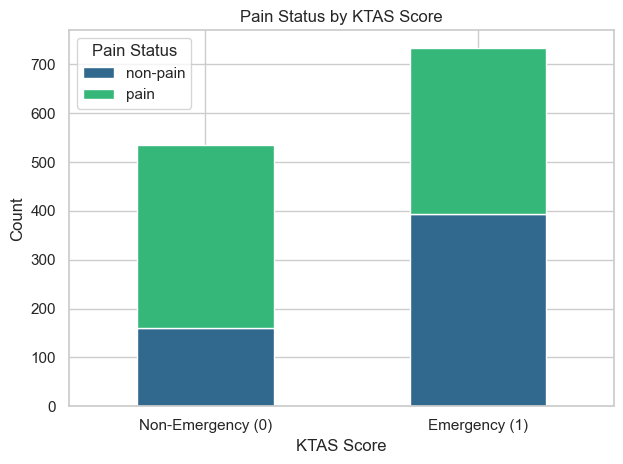

In [43]:


# Create a DataFrame for the counts of Pain status by KTAS score
pain_status_counts = data.groupby('KTAS_expert')['Pain'].value_counts().unstack()

# Plotting
plt.figure(figsize=(10, 5))
pain_status_counts.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', n_colors=pain_status_counts.shape[1]))
plt.title('Pain Status by KTAS Score')
plt.ylabel('Count')
plt.xlabel('KTAS Score')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Pain Status')
plt.tight_layout()
# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()


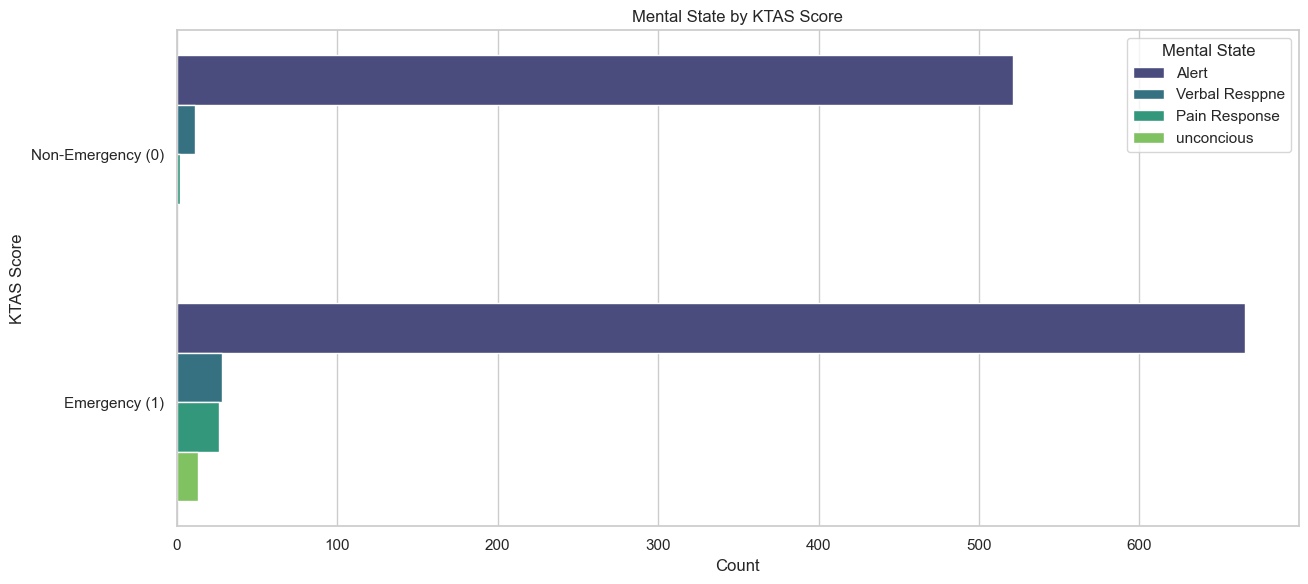

In [45]:
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='KTAS_expert', hue='Mental', palette='viridis')

plt.title('Mental State by KTAS Score')
plt.xlabel('Count')
plt.ylabel('KTAS Score')
plt.legend(title='Mental State')
plt.tight_layout()
# Show the plot
plt.yticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()
plt.show()

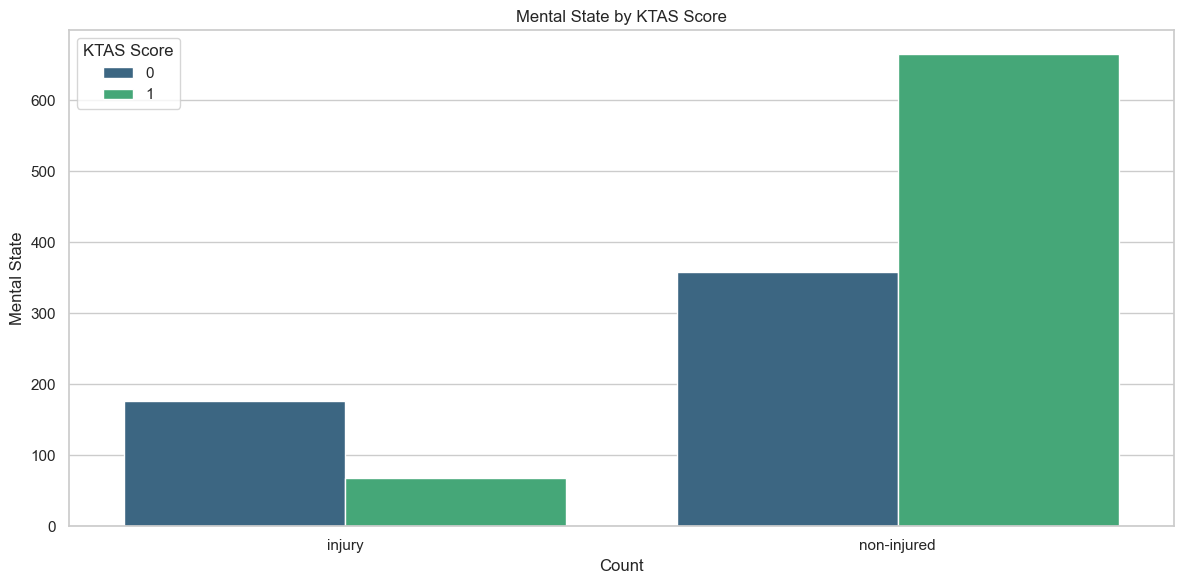

In [46]:
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Injury', hue='KTAS_expert', palette='viridis')

plt.title('Mental State by KTAS Score')
plt.xlabel('Count')

plt.ylabel('Mental State')
plt.legend(title='KTAS Score')
plt.tight_layout()
plt.show()

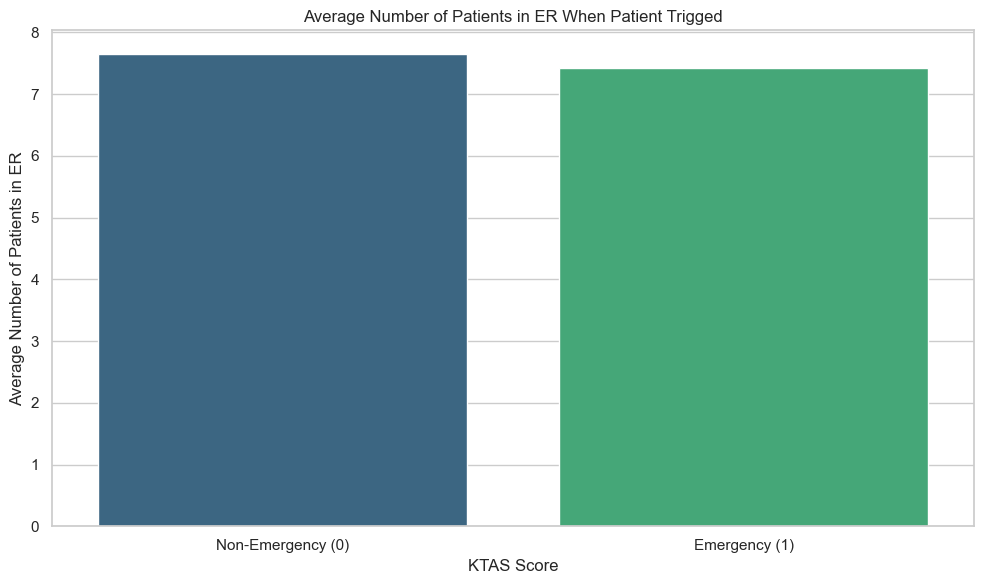

In [47]:
# Calculate the average number of patients per hour for each KTAS score
average_patients = data.groupby('KTAS_expert')['Patients number per hour'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_patients, x='KTAS_expert', y='Patients number per hour', palette='viridis')

plt.title('Average Number of Patients in ER When Patient Trigged')  # Title
plt.ylabel('Average Number of Patients in ER')  # Y-axis label
plt.xlabel('KTAS Score')  # X-axis label

plt.tight_layout()  # Adjust layout
# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary

plt.show()


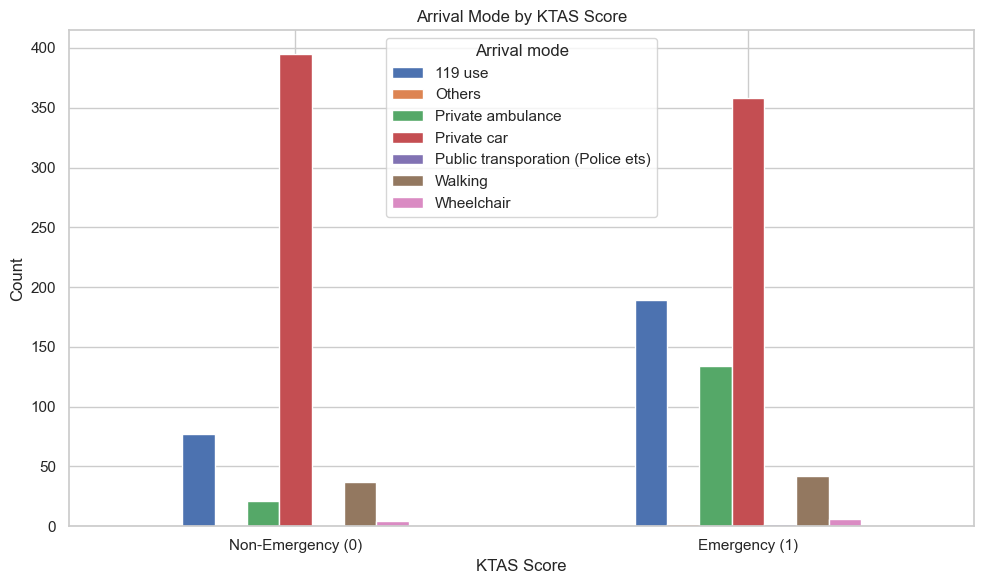

In [48]:
# Grouping by KTAS and counting arrival mode
data.groupby('KTAS_expert')['Arrival mode'].value_counts().unstack().plot(kind='bar', figsize=(10, 6))

plt.title('Arrival Mode by KTAS Score')  # Title
plt.ylabel('Count')  # Y-axis label
plt.xlabel('KTAS Score')  # X-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()


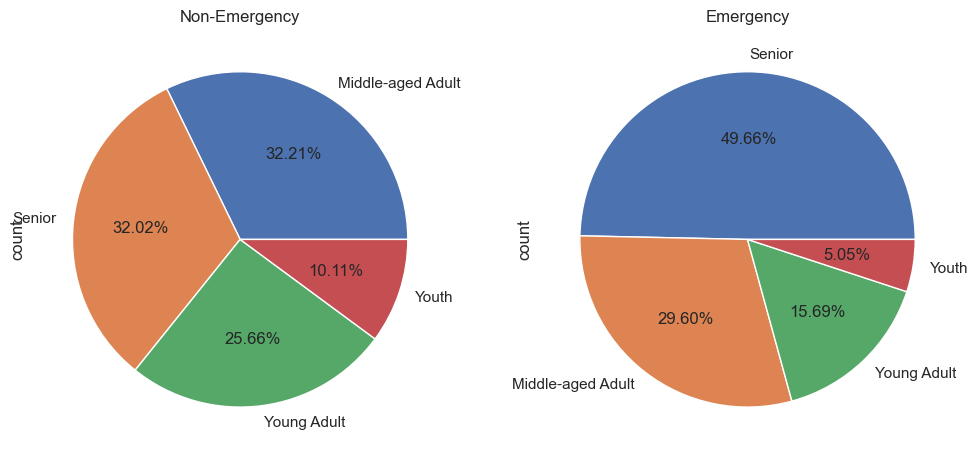

In [49]:
# Plotting the age group vs KTAS score breakdown
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjusted figure size for better layout

# Loop through KTAS expert values and plot
for k, ax in zip([0, 1], axes):
    age_counts = data.loc[data['KTAS_expert'] == k, 'age_group'].value_counts()
    age_counts.plot(
        kind='pie',
        ax=ax,
        autopct='%0.2f%%',
        title='Emergency' if k == 1 else 'Non-Emergency'
    )

# Display the plot
plt.tight_layout()
plt.show()

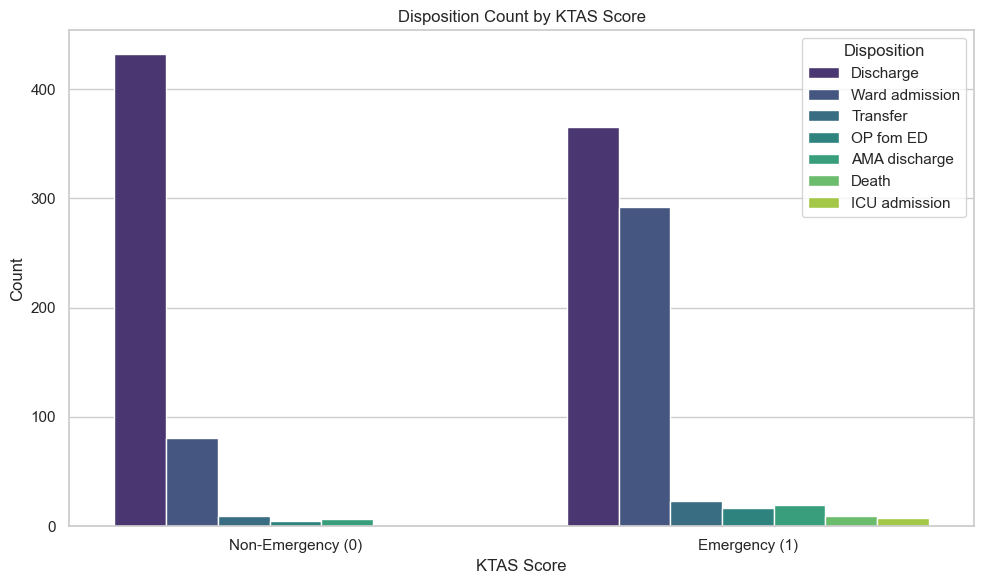

In [50]:
# Creating a count plot for disposition by KTAS score
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='KTAS_expert', hue='Disposition', palette='viridis')

plt.title('Disposition Count by KTAS Score')
plt.ylabel('Count')
plt.xlabel('KTAS Score')
plt.legend(title='Disposition')
plt.tight_layout()
# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()


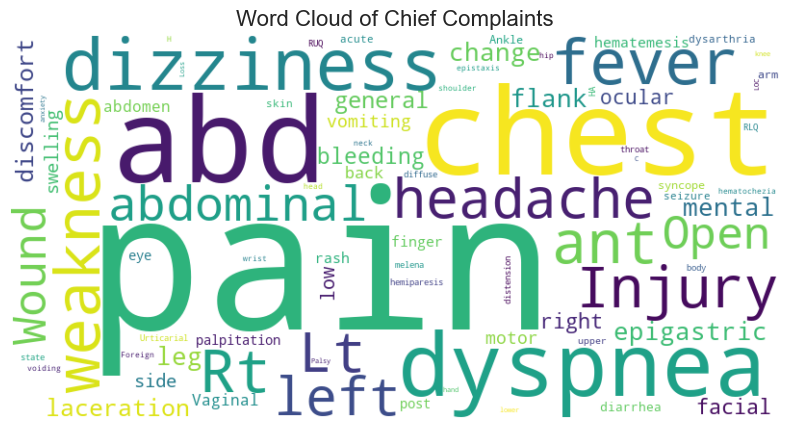

In [51]:
from wordcloud import WordCloud

# Generate the word cloud
word_cloud2 = WordCloud(
    collocations=False,        # Do not combine words with common collocations
    background_color='white',  # Set background color to white
    max_words=80,             # Limit the maximum number of words
    width=800,                # Set width of the word cloud image
    height=400                # Set height of the word cloud image
).generate(' '.join(data['Chief_complain'].dropna().astype(str)))  # Joining the complaints into a single string

# Display the word cloud
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(word_cloud2, interpolation='bilinear')  # Display the word cloud
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Chief Complaints', fontsize=16)  # Optional: Add a title
plt.show()  # Show the plot


In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate CountVectorizer
bagofwords = CountVectorizer(min_df=10, stop_words="english", max_features=500)

# 2. Fit the vectorizer to the 'Chief_complain' column
bagofwords.fit(data['Chief_complain'].dropna())  # Ensure no NaN values disrupt fitting

# 3. Transform the 'Chief_complain' column into a bag-of-words matrix
CF = bagofwords.transform(data['Chief_complain'].dropna())  # Transform the same data without NaN values

# 4. Create a DataFrame of the most common words
df_transformed = pd.DataFrame(
    data=CF.toarray(), 
    columns=bagofwords.get_feature_names_out(), 
    index=data['Chief_complain'].dropna().index  # Ensure the index matches the transformed data
)

# 5. Viewing the created DataFrame
df_transformed.head()  # Display the first few rows of the transformed DataFrame


,abd,abdomen,abdominal,acute,ankle,ant,arm,bleeding,change,chest,...,right,rt,seizure,skin,swelling,syncope,vaginal,vomiting,weakness,wound
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.linear_model import LogisticRegression

# 1. Fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
logreg.fit(df_transformed, data['KTAS_expert'])




LogisticRegression(max_iter=1000)

In [54]:
# 2. Create a DataFrame of features and their coefficients
coefficients_df = pd.DataFrame({
    "Feature": df_transformed.columns.tolist(),
    "Coefficients": logreg.coef_[0]
}).sort_values("Coefficients", ascending=False)

# 3. Display the top 3 features with the highest coefficients
print(coefficients_df.head(3))

      Feature  Coefficients
14    dyspnea      2.652192
12  dizziness      2.264698
9       chest      2.165830


<Figure size 1000x500 with 0 Axes>

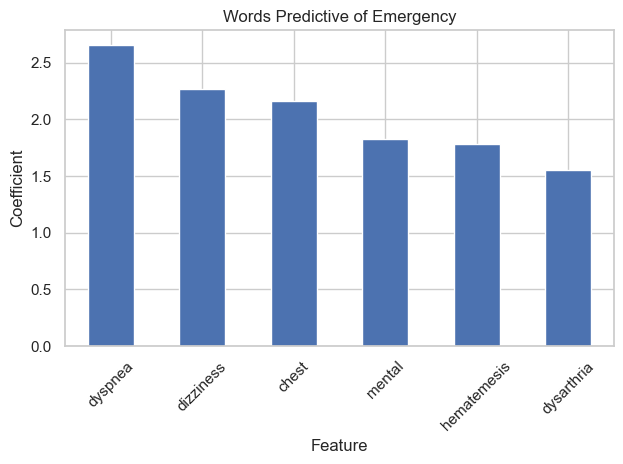

In [55]:
# 4. Plot the top 6 features with the highest coefficients
plt.figure(figsize=(10, 5))
coefficients_df.head(6).plot(kind='bar', x='Feature', legend=False)
plt.title('Words Predictive of Emergency')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# 5. Display the bottom 6 features with the lowest coefficients
print(coefficients_df.tail(6))



       Feature  Coefficients
24      injury     -1.045348
37        rash     -1.065515
4        ankle     -1.305720
27         leg     -1.387796
42    swelling     -1.471253
25  laceration     -2.272539


<Figure size 1000x500 with 0 Axes>

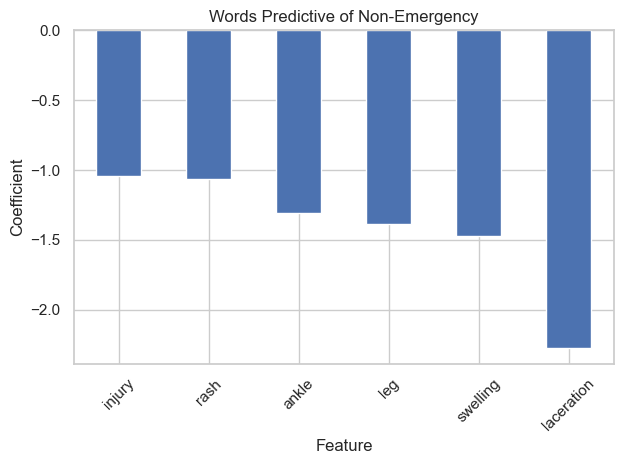

In [57]:
# 6. Plot the top 6 features with the lowest coefficients
plt.figure(figsize=(10, 5))
coefficients_df.tail(6).plot(kind='bar', x='Feature', legend=False)
plt.title('Words Predictive of Non-Emergency')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
import numpy as np
import pandas as pd

# Dropping irrelevant columns
data.drop(['KTAS_RN', 'Error_group', 'KTAS duration_min', 'mistriage', 
              'Diagnosis in ED', 'Disposition', 'age_group', 'Length of stay_min'], axis=1, inplace=True)

# Converting categorical columns to dummies
data = pd.get_dummies(data, columns=['Group', 'Arrival mode', 'Mental', 'Injury', 'Gender', 'Pain'])

# Selecting and listing the names of columns that have boolean data types
bool_columns = data.select_dtypes(include=[bool]).columns.to_list()
data[bool_columns] = data[bool_columns].astype(int)

# Dropping reference columns
data.drop(['Arrival mode_Others', 'Group_Regional ED', 'Mental_unconcious', 
              'Pain_pain', 'Gender_Male', 'Injury_injury'], axis=1, inplace=True)

# Selecting and listing the names of columns that have numeric data types
num_columns = data.select_dtypes(include=np.number).columns.to_list()

# Check for null values
print(data.isnull().sum())


Age                                               0
Patients number per hour                          0
Chief_complain                                    0
NRS_pain                                          0
SBP                                               0
DBP                                               0
HR                                                0
RR                                                0
BT                                                0
Saturation                                        0
KTAS_expert                                       0
Group_Local ED                                    0
Arrival mode_119 use                              0
Arrival mode_Private ambulance                    0
Arrival mode_Private car                          0
Arrival mode_Public transporation (Police ets)    0
Arrival mode_Walking                              0
Arrival mode_Wheelchair                           0
Mental_Alert                                      0
Mental_Pain 

<Figure size 640x480 with 0 Axes>

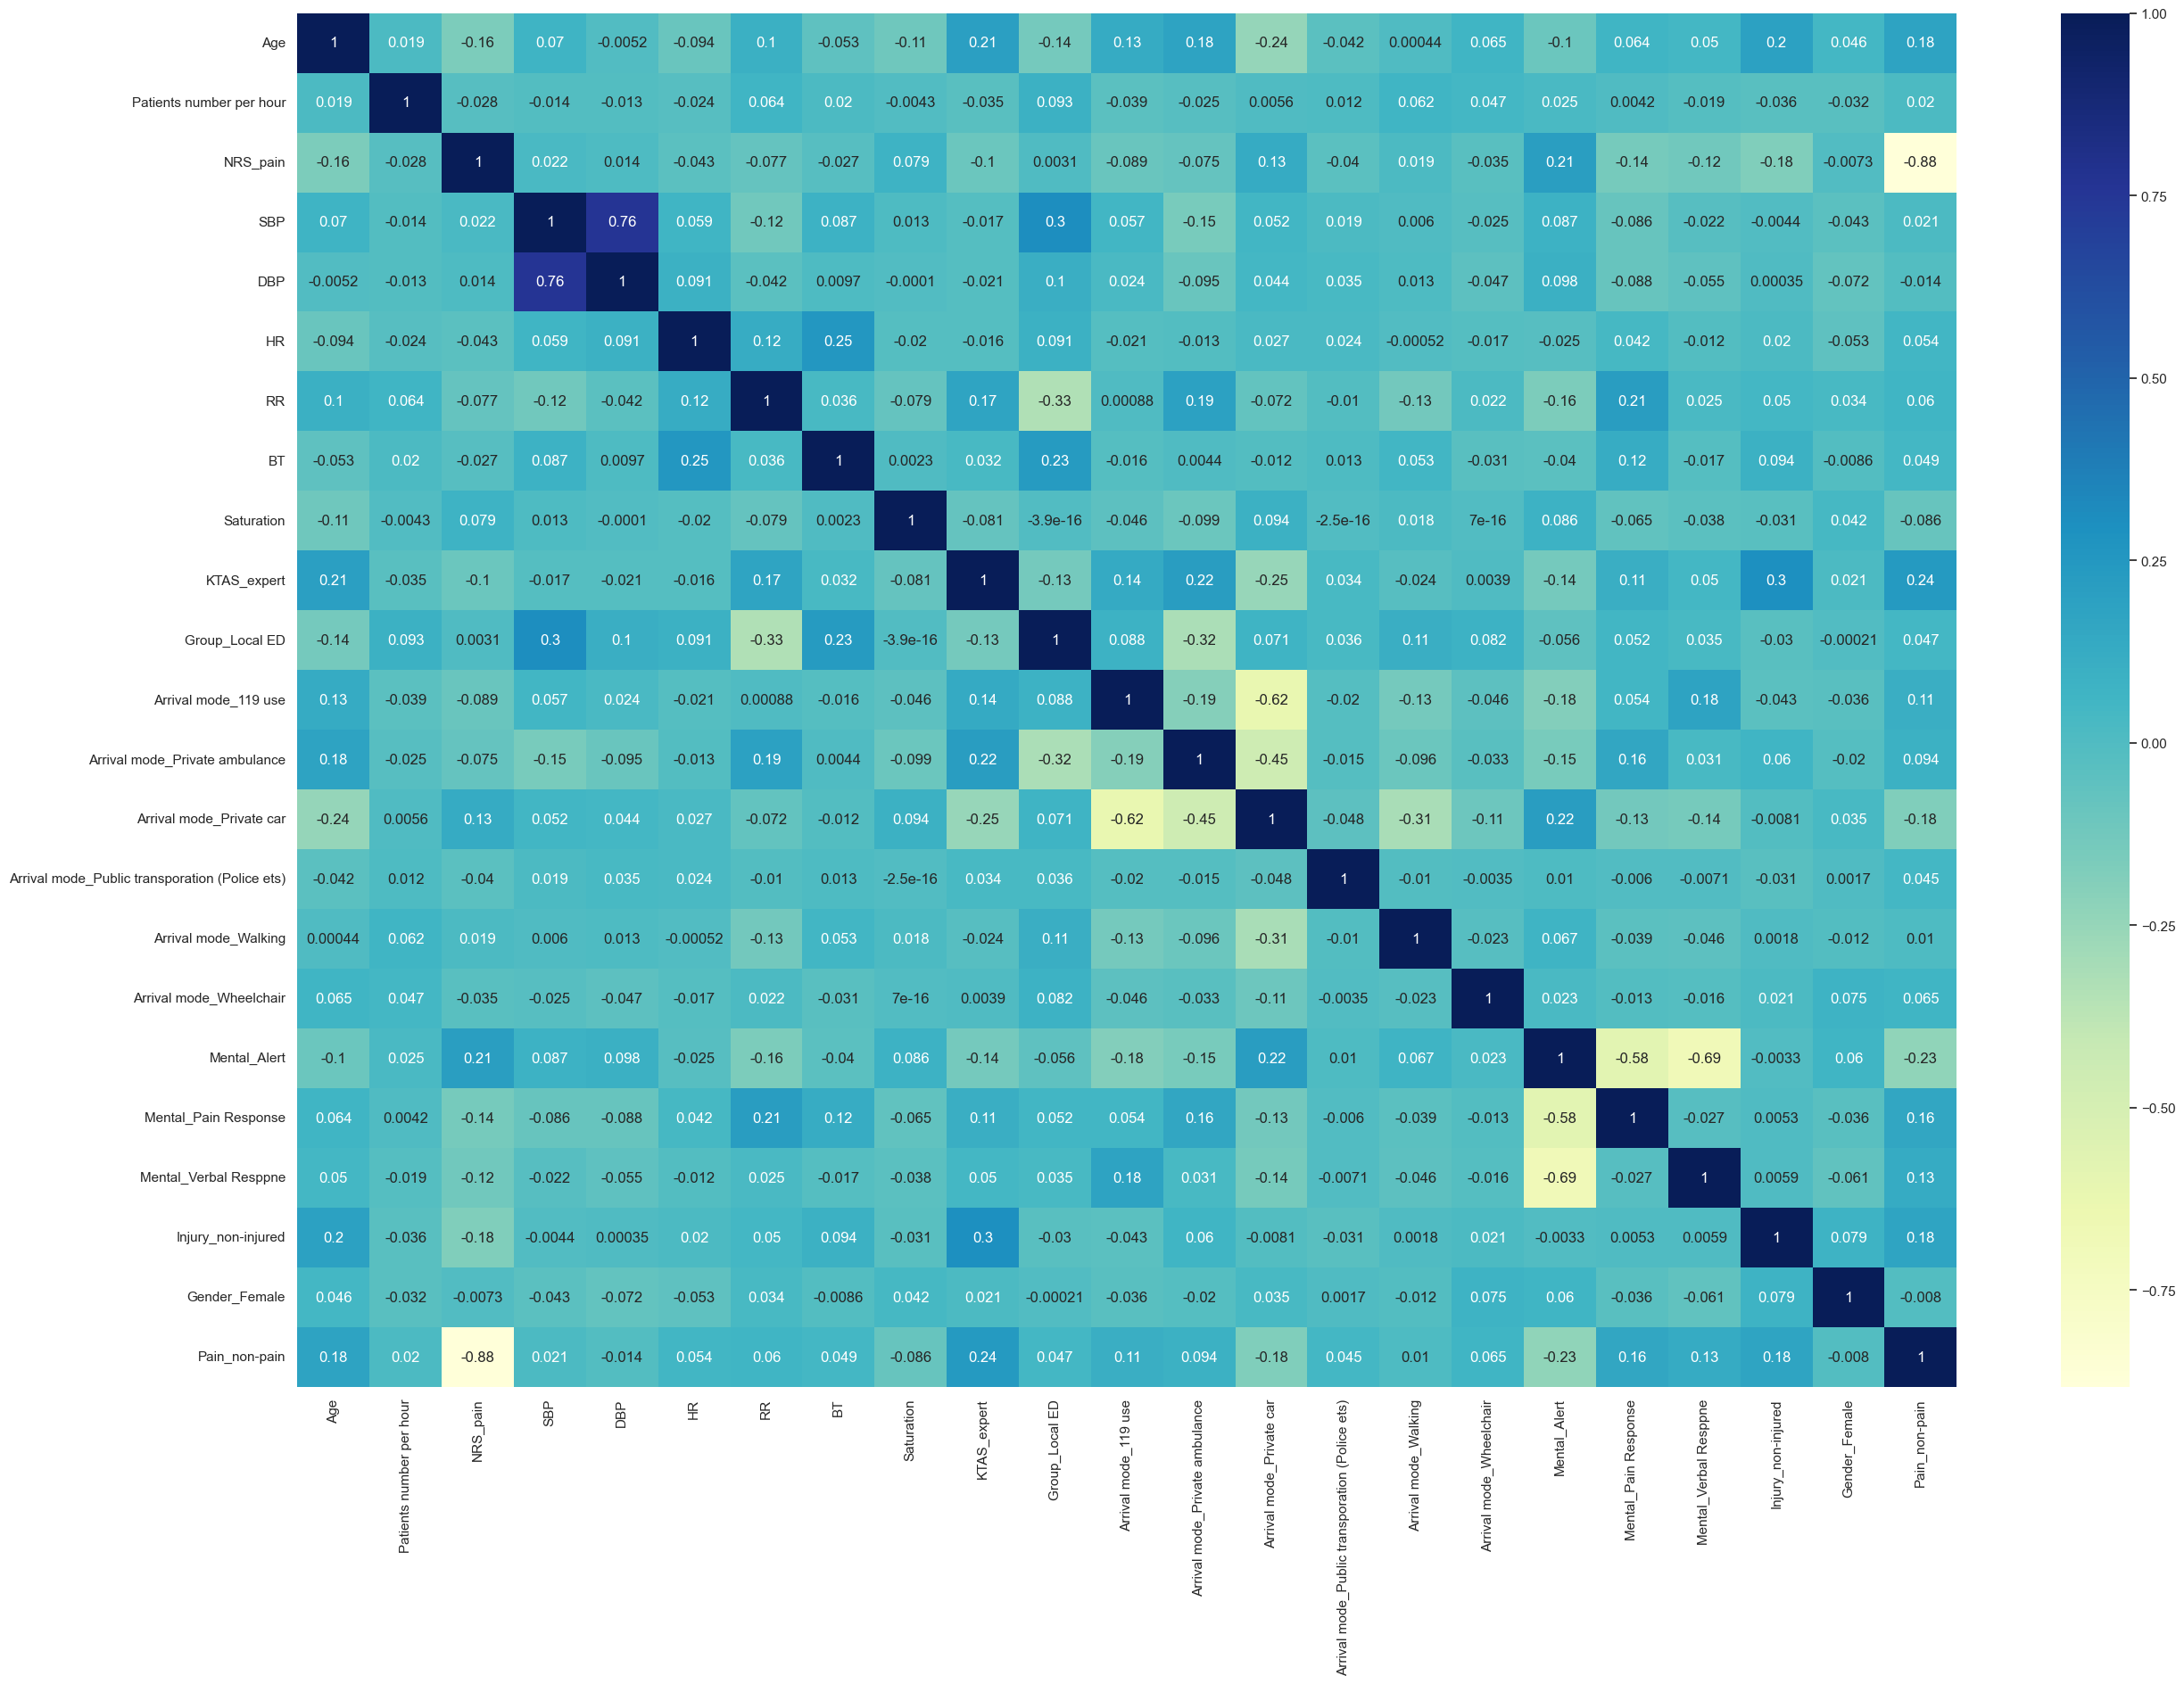

In [59]:
#running a correlation matric
plt.figure()
# Visualize with seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(data[num_columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [60]:
# Dropping correlated independent variables
data.drop(['Pain_non-pain', 'SBP'], axis=1, inplace=True)

In [61]:
# Retrieving numeric columns 
df_num = data[['Age', 'Patients number per hour', 'NRS_pain', 'DBP', 'HR', 'RR', 'BT', 'Saturation']]

# Retrieving categorical columns
df_cat = data.drop(['Age', 'Patients number per hour', 'NRS_pain', 'DBP', 'HR', 
                               'RR', 'BT', 'Saturation', 'KTAS_expert', 'Chief_complain'], axis=1)

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)
df_numeric_scaled = pd.DataFrame(data=scaled_data, columns=df_num.columns)

In [63]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2


# Variance Thresholding
vt = VarianceThreshold(threshold=0.001)
vt.fit(df_numeric_scaled)


VarianceThreshold(threshold=0.001)

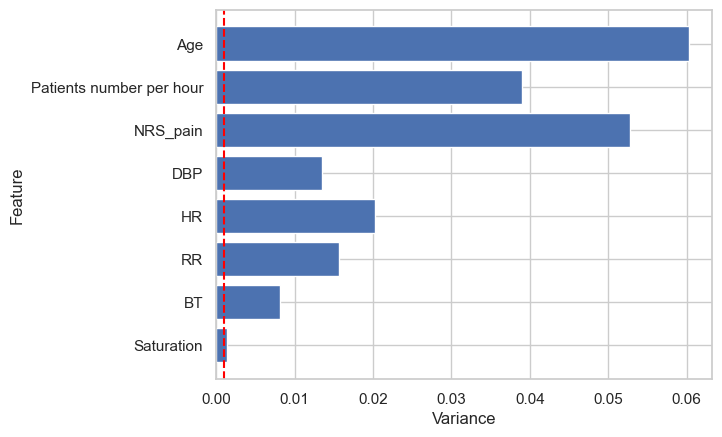

In [65]:
column_variances = vt.variances_

# Plotting the variances
plt.figure()
plt.barh(np.flip(df_numeric_scaled.columns), np.flip(column_variances))
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.axvline(0.001, color='red', linestyle='--')
plt.show()

<Axes: title={'center': 'Numeric Columns Kbest'}>

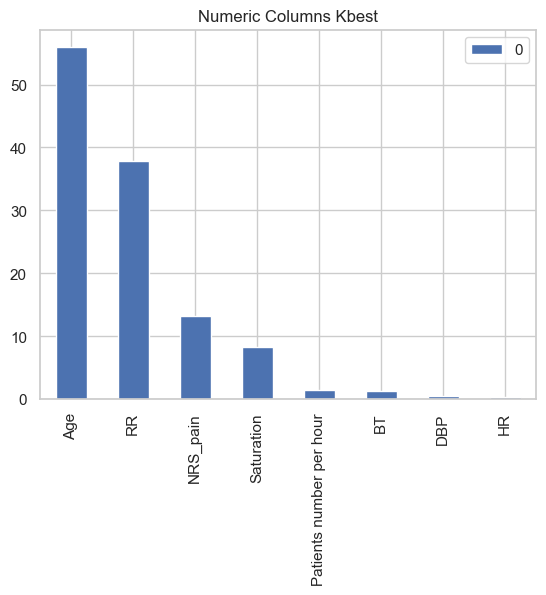

In [66]:
# KBest selection for numeric columns
X = df_numeric_scaled
y = data['KTAS_expert']
my_KBest = SelectKBest(f_classif, k=3).fit(X, y)
df2 = pd.DataFrame(my_KBest.scores_.reshape(-1, len(my_KBest.scores_)), columns=df_numeric_scaled.columns).transpose()
df2.sort_values(by=0, ascending=False).plot(kind='bar', title='Numeric Columns Kbest')


<Axes: title={'center': 'Categorical Columns Kbest'}>

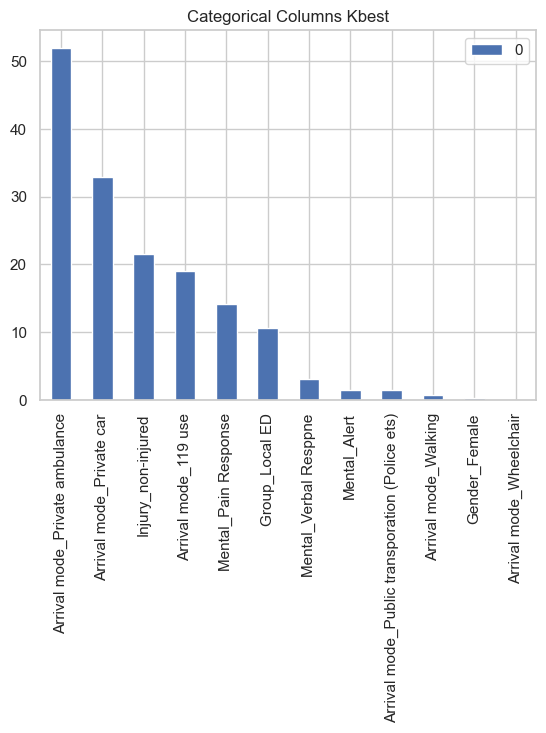

In [67]:
# KBest selection for categorical columns
X = df_cat
y = data['KTAS_expert']
my_KBest_cat = SelectKBest(chi2, k=2).fit(X, y)
df = pd.DataFrame(my_KBest_cat.scores_.reshape(-1, len(my_KBest_cat.scores_)), columns=df_cat.columns).transpose()
df.sort_values(by=0, ascending=False).plot(kind='bar', title='Categorical Columns Kbest')


In [190]:
# Finalizing features
X_final = data[['Age', 'Patients number per hour', 'NRS_pain', 'RR', 'Saturation',
                   'Chief_complain', 'Arrival mode_Private ambulance', 
                   'Arrival mode_Private car', 'Injury_non-injured', 
                   'Arrival mode_119 use', 'Mental_Pain Response']]
y_final = data[['KTAS_expert']]

In [191]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Instantiate and fit a single CountVectorizer
bagofwords = CountVectorizer(max_features=12)
CF_train = bagofwords.fit_transform(X_train['Chief_complain'])
CF_test = bagofwords.transform(X_test['Chief_complain'])

# Combine transformed text data with remaining features
df_transformed_train = pd.concat([X_train.drop(['Chief_complain'], axis=1),
                                   pd.DataFrame(CF_train.toarray(), columns=bagofwords.get_feature_names_out(), index=X_train.index)],
                                  axis=1)

df_transformed_test = pd.concat([X_test.drop(['Chief_complain'], axis=1),
                                  pd.DataFrame(CF_test.toarray(), columns=bagofwords.get_feature_names_out(), index=X_test.index)],
                                 axis=1)



In [192]:
#running a logistic regression model
logreg = LogisticRegression()
logreg.fit(df_transformed_train, y_train)

# We will score the model against the train and test data
print(f"Train score: {logreg.score(df_transformed_train, y_train)}")
print(f"Test score: {logreg.score(df_transformed_test, y_test)}")

Train score: 0.702862783810464
Test score: 0.7322834645669292


In [170]:
#predicting using the test dataset
y_pred = logreg.predict(df_transformed_test)

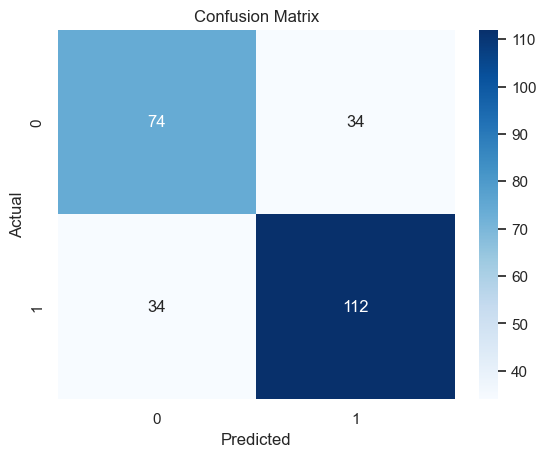

In [171]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [172]:
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.7671232876712328

In [173]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.7671232876712328

In [174]:
# Model evaluation
y_pred = logreg.predict(df_transformed_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 74  34]
 [ 34 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       108
           1       0.77      0.77      0.77       146

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



In [175]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Assuming df_transformed_train and y_train are already defined
# Create a pipeline for logistic regression
estimators_log = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

my_pipe = Pipeline(estimators_log)

# Define the hyperparameter grid
param_grid = [
    {
        'scaler': [StandardScaler(), None],
        'model': [LogisticRegression()], 
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga', 'lbfgs']
    }
]

# Running a grid search to find the best hyperparameters
grid = GridSearchCV(my_pipe, param_grid, cv=3)
fittedgrid = grid.fit(df_transformed_train, y_train)

# Print best parameters
print(f"Best parameters: {fittedgrid.best_params_}")

# Using the best hyperparameters to create a new pipeline
estimators2 = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.1, penalty='l2', solver='saga'))
]

my_pipe2 = Pipeline(estimators2)

# Fit the model with the training data
my_pipe2.fit(df_transformed_train, y_train)

# Print test and training scores
print(f'Test score: {my_pipe2.score(df_transformed_test, y_test)}')
print(f'Training score: {my_pipe2.score(df_transformed_train, y_train)}')

# Calculate recall
y_pred_log_opt = my_pipe2.predict(df_transformed_test)
recall = recall_score(y_test, y_pred_log_opt)
print(f'Recall: {recall}')


Best parameters: {'model': LogisticRegression(), 'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'saga', 'scaler': StandardScaler()}
Test score: 0.7362204724409449
Training score: 0.7038499506416585
Recall: 0.7465753424657534


In [177]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('logreg', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__solver': ['lbfgs', 'saga']
}

# Setting up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(df_transformed_train, np.ravel(y_train))

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.predict(df_transformed_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'logreg__C': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Accuracy Score: 0.7402
Confusion Matrix:
[[ 80  28]
 [ 38 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       108
           1       0.79      0.74      0.77       146

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.74      0.74      0.74       254



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [178]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Creating a pipeline to run the Decision Tree model
estimators3 = [
    ('scaler', StandardScaler()),  # Scaling the data
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

my_pipe3 = Pipeline(estimators3)

# Define the hyperparameter grid for grid search
param_grid = [
    {
        'scaler': [StandardScaler(), None],  # Options for scaling
        'model': [DecisionTreeClassifier()],  # Model options
        'model__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 20],  # Max depth of the tree
        'model__min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 20]  # Minimum samples per leaf
    }
]

# Running a grid search to find the best hyperparameters
grid = GridSearchCV(my_pipe3, param_grid, cv=5)
fittedgrid2 = grid.fit(df_transformed_train, y_train)

# Displaying the best parameters
print(f"Best parameters: {fittedgrid2.best_params_}")

# Using the best parameters to create a new pipeline
estimators4 = [
    ('scaler', StandardScaler()),  # Scaling the data
    ('model', DecisionTreeClassifier(max_depth=6, min_samples_leaf=14))  # Using the best parameters
]

my_pipe4 = Pipeline(estimators4)

# Fit the model with the training data
my_pipe4.fit(df_transformed_train, y_train)

# Print test score
print(f'Test score: {my_pipe4.score(df_transformed_test, y_test)}')

# Predicting on test data
y_pred_Dec = my_pipe4.predict(df_transformed_test)

# Calculate recall
recall = recall_score(y_test, y_pred_Dec)
print(f'Recall: {recall}')


Best parameters: {'model': DecisionTreeClassifier(), 'model__max_depth': 6, 'model__min_samples_leaf': 10, 'scaler': None}
Test score: 0.7716535433070866
Recall: 0.8767123287671232


In [179]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Creating a pipeline to run the KNN model
estimators5 = [
    ('scaler', StandardScaler()),  # Scaling the data
    ('model', KNeighborsClassifier())  # KNN model
]

my_pipe5 = Pipeline(estimators5)

# Define the hyperparameter grid for grid search
param_grid = [
    {
        'scaler': [StandardScaler(), None],  # Options for scaling
        'model': [KNeighborsClassifier()],  # Model options
        'model__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]  # Number of neighbors
    }
]

# Running a grid search to find the best hyperparameters
grid = GridSearchCV(my_pipe5, param_grid, cv=5)
fittedgrid5 = grid.fit(df_transformed_train, y_train)

# Displaying the best parameters
print(f"Best parameters: {fittedgrid5.best_params_}")

# Using the best parameters to create a new pipeline
estimators6 = [
    ('scaler', StandardScaler()),  # Scaling the data
    ('model', KNeighborsClassifier(n_neighbors=fittedgrid5.best_params_['model__n_neighbors']))  # Using the best n_neighbors
]

my_pipe6 = Pipeline(estimators6)

# Fit the model with the training data
my_pipe6.fit(df_transformed_train, y_train)

# Print test score
print(f'Test score: {my_pipe6.score(df_transformed_test, y_test)}')


Best parameters: {'model': KNeighborsClassifier(), 'model__n_neighbors': 16, 'scaler': StandardScaler()}
Test score: 0.7401574803149606


In [180]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Scaling the dataset
my_standard_scaler = StandardScaler()
my_standard_scaler.fit(df_transformed_train)
df_transformed_train = my_standard_scaler.transform(df_transformed_train)
df_transformed_test = my_standard_scaler.transform(df_transformed_test)

# Creating the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Selecting range of parameters for grid search
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

# Running grid search to find the best parameters
grid_search_gbc = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_gbc.fit(df_transformed_train, np.ravel(y_train))

# Best score
print(f"Best score: {grid_search_gbc.best_score_}")

# Best parameters 
print(f"Best parameters: {grid_search_gbc.best_params_}")

# Tuned GBC model using the best parameters
tuned_gbc = GradientBoostingClassifier(
    learning_rate=grid_search_gbc.best_params_['learning_rate'],
    loss=grid_search_gbc.best_params_['loss'],
    n_estimators=grid_search_gbc.best_params_['n_estimators']
)

# Fitting the model on the training data
tuned_gbc.fit(df_transformed_train, y_train)

# Printing test score using the tuned GBC model
print(f'Test score: {tuned_gbc.score(df_transformed_test, y_test)}')

# Predicting on test data
y_pred2 = tuned_gbc.predict(df_transformed_test)

# Printing classification report
print(classification_report(y_test, y_pred2))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best score: 0.775886455640638
Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
Test score: 0.7952755905511811
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       108
           1       0.78      0.90      0.83       146

    accuracy                           0.80       254
   macro avg       0.80      0.78      0.78       254
weighted avg       0.80      0.80      0.79       254



In [181]:
# Define a function to plot and print feature importances
def plot_and_print_model_var_imp(model, features):
    imp = pd.DataFrame(
        model.feature_importances_,
        columns=['Importance'],
        index=features
    )
    imp = imp.sort_values(by='Importance', ascending=False)

    # Print the feature importances in a table
    print("Feature Importances:")
    print(imp)

    # Plot the feature importances as a bar chart
    imp.plot(kind='barh', figsize=(12, 6))
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Random Forest Regressor')
    plt.show()

Feature Importances:
                                Importance
Age                               0.219153
NRS_pain                          0.162352
Patients number per hour          0.133258
Saturation                        0.072038
Injury_non-injured                0.071205
RR                                0.064518
Arrival mode_Private car          0.036617
chest                             0.035640
pain                              0.028113
Arrival mode_Private ambulance    0.024372
dizziness                         0.022995
Arrival mode_119 use              0.019773
dyspnea                           0.018911
abd                               0.018402
fever                             0.013354
headache                          0.010183
weakness                          0.009654
rt                                0.008361
ant                               0.008326
lt                                0.007955
injury                            0.007518
Mental_Pain Response             

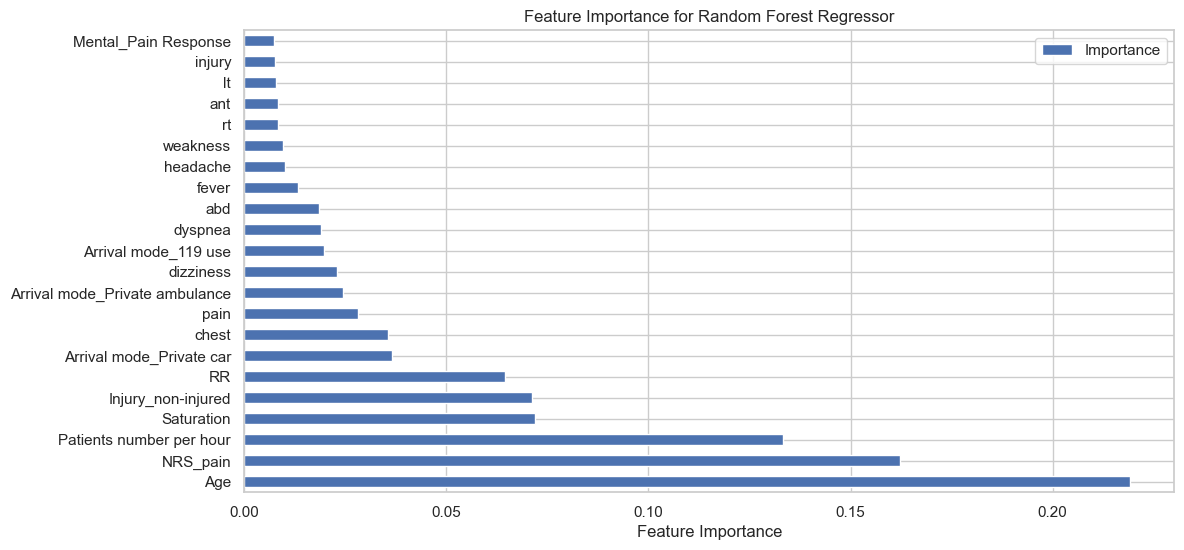

In [194]:
# Call the function to plot and print feature importances
plot_and_print_model_var_imp(rf_model, df_transformed_train.columns)

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(df_transformed_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(df_transformed_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n{report}")

Logistic Regression Accuracy: 0.74
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       108
           1       0.79      0.74      0.77       146

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.74      0.74      0.74       254

Random Forest Accuracy: 0.79
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       108
           1       0.80      0.86      0.83       146

    accuracy                           0.79       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.79      0.79       254

SVM Accuracy: 0.76
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       108
           1       0.85      0.70      0.77    

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(df_transformed_train, y_train.values.ravel())

# Make predictions
y_pred_rf = rf_model.predict(df_transformed_test)

# Evaluate the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy:  0.8149606299212598
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       108
           1       0.81      0.88      0.85       146

    accuracy                           0.81       254
   macro avg       0.82      0.80      0.81       254
weighted avg       0.82      0.81      0.81       254



In [186]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gb_model.fit(df_transformed_train, y_train.values.ravel())

# Make predictions
y_pred_gb = gb_model.predict(df_transformed_test)

# Evaluate the model
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy:  0.7834645669291339
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       108
           1       0.77      0.88      0.82       146

    accuracy                           0.78       254
   macro avg       0.79      0.77      0.77       254
weighted avg       0.79      0.78      0.78       254



In [187]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Instantiate the Stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
stacking_model.fit(df_transformed_train, y_train.values.ravel())

# Make predictions
y_pred_stack = stacking_model.predict(df_transformed_test)

# Evaluate the model
print("Stacking Model Accuracy: ", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))


Stacking Model Accuracy:  0.7992125984251969
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       108
           1       0.79      0.88      0.83       146

    accuracy                           0.80       254
   macro avg       0.80      0.78      0.79       254
weighted avg       0.80      0.80      0.80       254



In [188]:
from sklearn.ensemble import VotingClassifier

# Define the voting model
voting_model = VotingClassifier(estimators=base_models, voting='soft')

# Fit the voting model on the training data
voting_model.fit(df_transformed_train, y_train.values.ravel())

# Make predictions
y_pred_vote = voting_model.predict(df_transformed_test)

# Evaluate the model
print("Voting Model Accuracy: ", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))


Voting Model Accuracy:  0.8031496062992126
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       108
           1       0.80      0.88      0.84       146

    accuracy                           0.80       254
   macro avg       0.81      0.79      0.79       254
weighted avg       0.80      0.80      0.80       254



In [189]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import pickle

def make_prediction(age, No_Patients_in_ER, RR, Saturation, NRS_pain, mode_of_transport, Chief_complain, injury, Mental_state):
    """
    Predicts whether a patient is an emergency or non-emergency case based on given features.

    Args:
        age (int): Patient's age.
        No_Patients_in_ER (int): Number of patients in the ER.
        RR (float): Respiratory rate.
        Saturation (float): Oxygen saturation.
        NRS_pain (int): Numerical rating scale for pain.
        mode_of_transport (str): Mode of transportation (e.g., 'car', 'Private ambulance', '119_use').
        Chief_complain (str): Chief complaint of the patient.
        injury (str): Whether the patient has an injury ('yes' or 'no').
        Mental_state (str): Mental state of the patient ('pain_response' or 'Normal').

    Returns:
        str: Prediction of whether the patient is an emergency or non-emergency case.
    """

    # Create DataFrame with input data
    data = {
        "Age": age,
        "RR": RR,
        "Saturation": Saturation,
        'Patients number per hour': No_Patients_in_ER,
        'NRS_pain': NRS_pain,
        'Arrival mode_Private ambulance': mode_of_transport,
        'Injury_non-injured': injury,
        'Chief_complain': Chief_complain,
        'Mental_Pain Response': Mental_state
    }

    # Create DataFrame from input data
    df_new = pd.DataFrame(data, index=[0])

    # Add missing columns with default values
    for col in ['Arrival mode_Private car', 'Arrival mode_119 use']:
        df_new[col] = 0

    # Split DataFrame into numeric, categorical, and text columns
    df_new_numeric = df_new[['Age', 'Patients number per hour', 'RR', 'Saturation', 'NRS_pain']]
    df_new_categoric = df_new[['Arrival mode_Private ambulance', 'Arrival mode_119 use', 'Arrival mode_Private car', 'Injury_non-injured', 'Mental_Pain Response']]
    df_new_text = df_new['Chief_complain']

    # Transform text column using CountVectorizer
    CF4 = bagofwords.transform(df_new['Chief_complain'])
    df_new_comp = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=CF4.toarray(), index=df_new.index)
    df_new = pd.concat([df_new_numeric, df_new_categoric, df_new_comp], axis=1)

    # Convert categorical columns to dummy variables using replace method
    df_new["Injury_non-injured"] = df_new["Injury_non-injured"].replace({'no': 1, 'yes': 0})
    df_new["Mental_Pain Response"] = df_new["Mental_Pain Response"].replace({'pain_response': 1, 'Normal': 0})
    df_new["Arrival mode_Private ambulance"] = df_new["Arrival mode_Private ambulance"].replace({'Private ambulance': 1, 'car': 0, '119_use': 0})
    df_new["Arrival mode_Private car"] = df_new["Arrival mode_Private car"].replace({'car': 1, 'Private ambulance': 0, '119_use': 0})
    df_new["Arrival mode_119 use"] = df_new["Arrival mode_119 use"].replace({'119_use': 1, 'car': 0, 'Private ambulance': 0})

    # Match order of training set
    final = df_new[['Age', 'Patients number per hour', 'NRS_pain', 'RR', 'Saturation', 'Arrival mode_Private ambulance', 'Arrival mode_Private car', 'Injury_non-injured', 'Arrival mode_119 use', 'Mental_Pain Response', 'abd', 'ant', 'chest', 'dizziness', 'dyspnea', 'fever', 'headache', 'injury', 'lt', 'pain', 'rt', 'weakness']]

    # Scale the dataset
    scaler.fit(final)
    df_transformed_unseen = scaler.transform(final)

    # Make prediction
    prediction = tuned_gbc.predict(df_transformed_unseen)

    # Print the prediction
    if prediction[0] == 1:
        print('\033[91m THIS PATIENT IS EMERGENCY!!!')
    else:
        print('\033[92m THIS PATIENT IS NON-EMERGENCY')

# Example usage
make_prediction(41, 5, 20.0, 98.00, 3.0, 'car', 'chest pain', 'yes', 'Normal')

 THIS PATIENT IS NON-EMERGENCY


In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(df_transformed_train, y_train)
    y_pred = model.predict(df_transformed_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1']:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.7323
  Precision: 0.7671
  Recall: 0.7671
  F1-score: 0.7671

Decision Tree:
  Accuracy: 0.7244
  Precision: 0.7879
  Recall: 0.7123
  F1-score: 0.7482

Random Forest:
  Accuracy: 0.7913
  Precision: 0.8000
  Recall: 0.8493
  F1-score: 0.8239

SVM:
  Accuracy: 0.6299
  Precision: 0.6250
  Recall: 0.8904
  F1-score: 0.7345

Naive Bayes:
  Accuracy: 0.6969
  Precision: 0.9059
  Recall: 0.5274
  F1-score: 0.6667

Gradient Boosting:
  Accuracy: 0.7874
  Precision: 0.7805
  Recall: 0.8767
  F1-score: 0.8258

Neural Network:
  Accuracy: 0.7205
  Precision: 0.7301
  Recall: 0.8151
  F1-score: 0.7702



In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(df_transformed_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.7916938984538848


In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(df_transformed_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.7857484270594547
